# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

In [3]:
df.shape

(1715, 25)

In [4]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [5]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [6]:
df.YEAR.nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [7]:
'Michigan' if(df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['MICHIGAN'] >= df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()['OHIO']) else 'Ohio'

'Ohio'

Find the average for your outcome score across all states in 2019

In [8]:
df[df.YEAR == 2019].AVG_MATH_8_SCORE.mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [9]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
# let's create a new column which represents expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **I believe that this feature will be useful because if money is spent in a right way, more the money spent, better results will be achieved.**



In [11]:
# Let' create another column which represents a ratio of number of enrollments to total enrollments.
df['ENROLL_12_TO_ENROLL_ALL'] = df['ENROLL_12'] / df['ENROLL_ALL']

Feature engineering justification: **I believe that this feature will be useful because if this ratio is high, it shows 
the overall eagerness for students to complete high school and inturn may show the importance they give to studies. More importance given to studies may result in more test preparation and hence more test scores.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:title={'center':'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

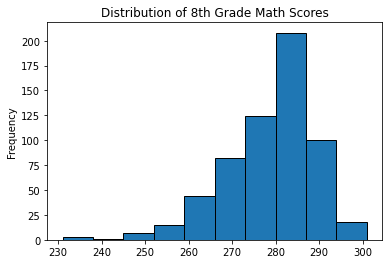

In [12]:
# note - this test is scored out of 500 according to the NAEP website
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

Text(0.5, 1.0, '8th Grade Math Score Over Time')

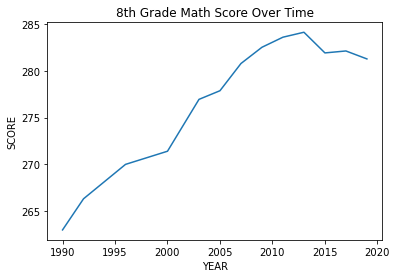

In [13]:
df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

Text(0, 0.5, '8th Grade Math Score')

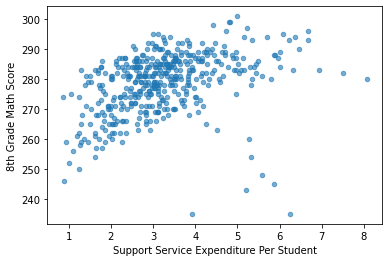

In [14]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Service Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

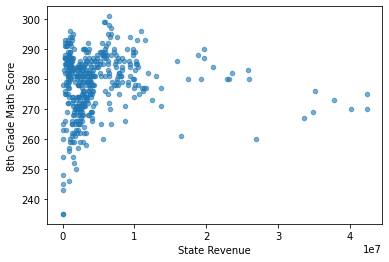

In [15]:
df.plot.scatter(x='STATE_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('State Revenue')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 2>**

**Visualization 3**

Text(0, 0.5, '8th Grade Math Score')

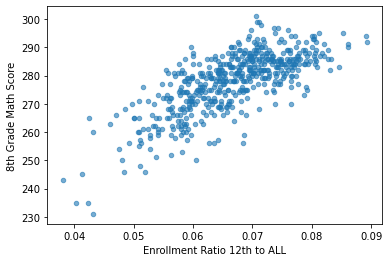

In [16]:
df.plot.scatter(x='ENROLL_12_TO_ENROLL_ALL', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Enrollment Ratio 12th to ALL')
plt.ylabel('8th Grade Math Score')

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df[['ENROLL_12_TO_ENROLL_ALL','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [24]:
print(model.intercept_)
print(model.coef_)

225.23800179737054
[726.10026473   1.65415473]


In [25]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)

0.5738694374744606

In [28]:
# mean error
np.mean(model.predict(X_test)-y_test)

1.1485748607460755

In [29]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

5.249548357711409

In [30]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

7.173230859830863

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

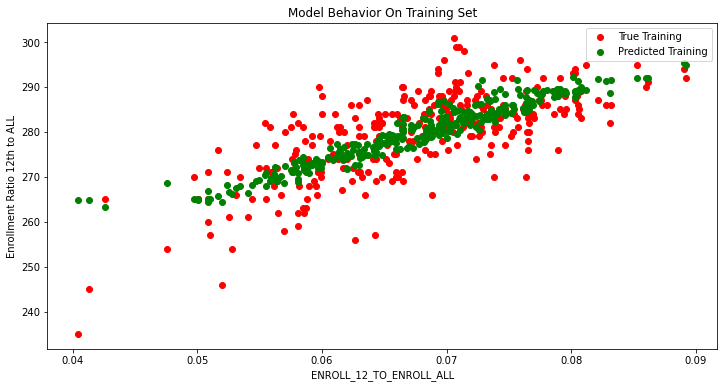

In [26]:
col_name = 'ENROLL_12_TO_ENROLL_ALL'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Enrollment Ratio 12th to ALL')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

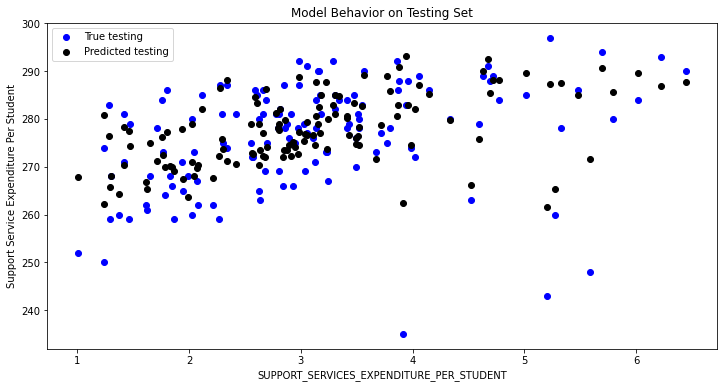

In [27]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Support Service Expenditure Per Student')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**In this work, I am trying to predict 8th grade math test score. There are a number of features available like year, state, federal revenue, state revenue, expenditure etc. I created 2 features from these columns - 1) Ratio of 12th grade enrollments to all grade enrollments and 2) Service Expenditure to number of enrollments. The rational behind why these two feature may predict the 8th grade math test scores is because more expenditure on education is suppositely improve educational quality and lower student drop out rate in schools may indicate that the state gives lot of importance to education. The EDA showed promising results especially with the feature 1 above. A simple linear regression model on these two features showd a R^2 of 0.57 which is a ok start. The R^2 value with just one feature above was 0.54 which shows this features good predictive power. To improve the model performance further, I would like to try doing more feature engineering and trying out different models like xgboost or random forest.**